In [ ]:
# histogram equalisation
# spatial domain

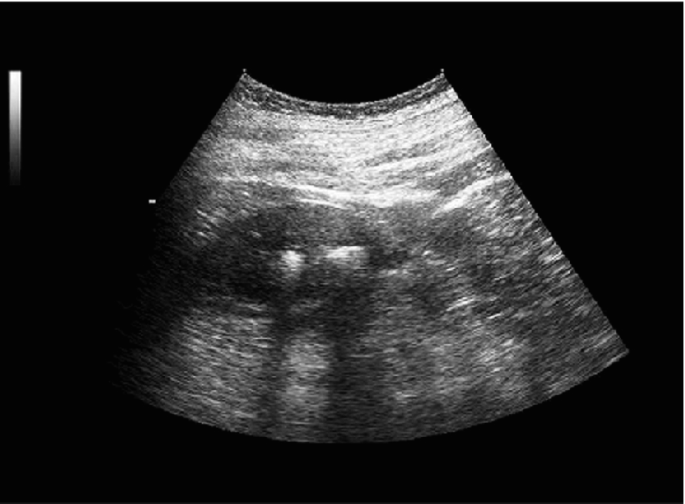

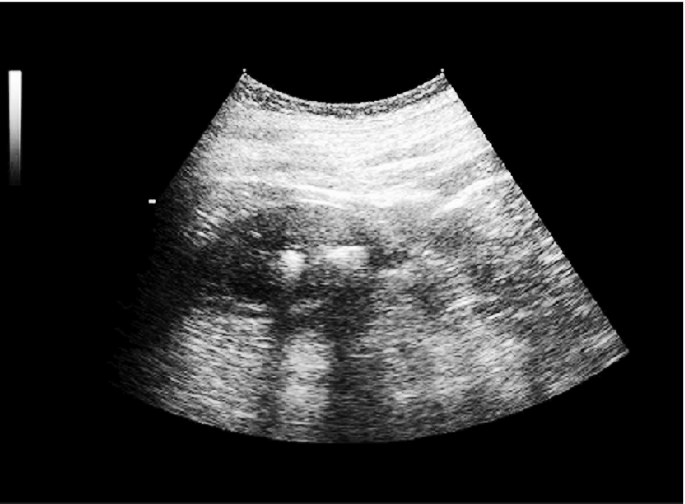

In [ ]:
import cv2

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(equalized_image)

In [ ]:
# histogram matching

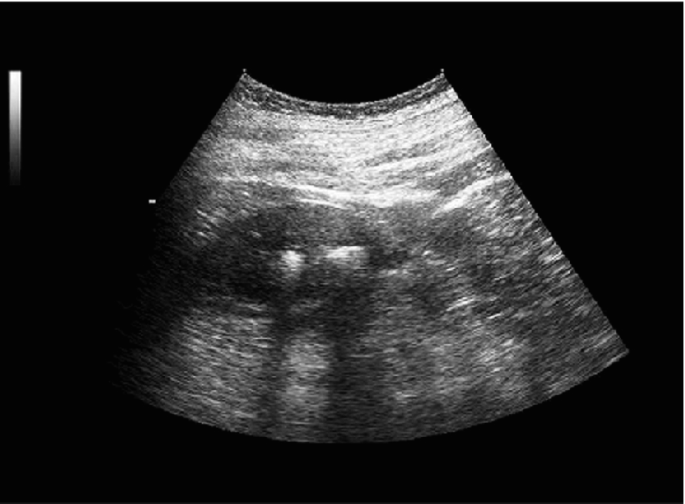

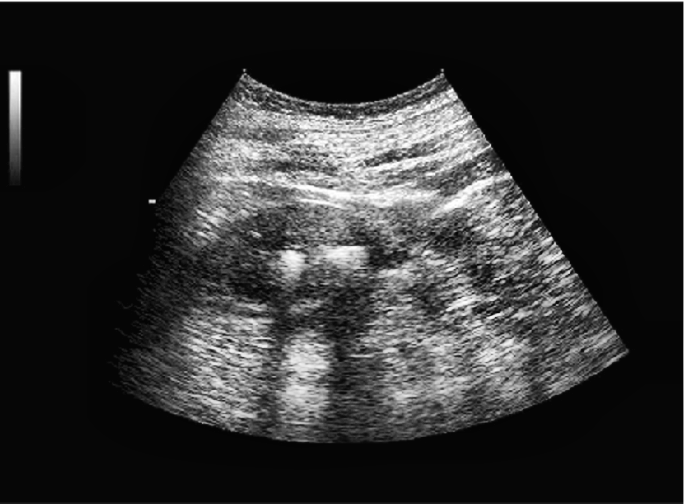

In [ ]:
# Load the reference image (replace 'reference_path' with the actual reference image file path)
reference_image = cv2.imread('Reference_image.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram matching
matched_image = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(image)

# Display the original and matched images
cv2_imshow(image)
cv2_imshow(matched_image)

In [ ]:
# fundamentals - kernels
# convolution

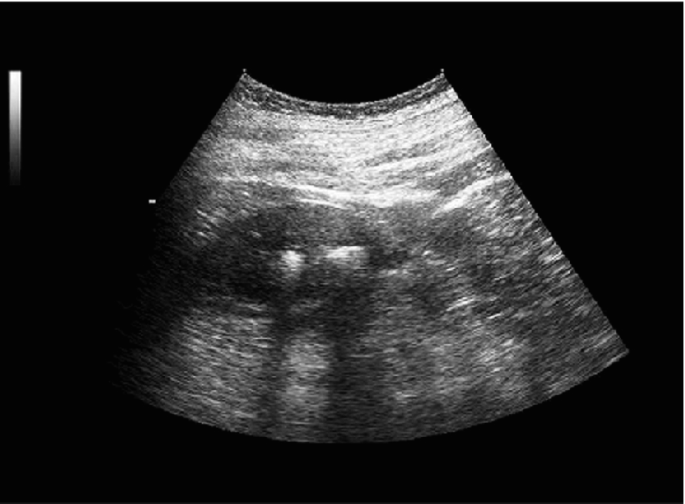

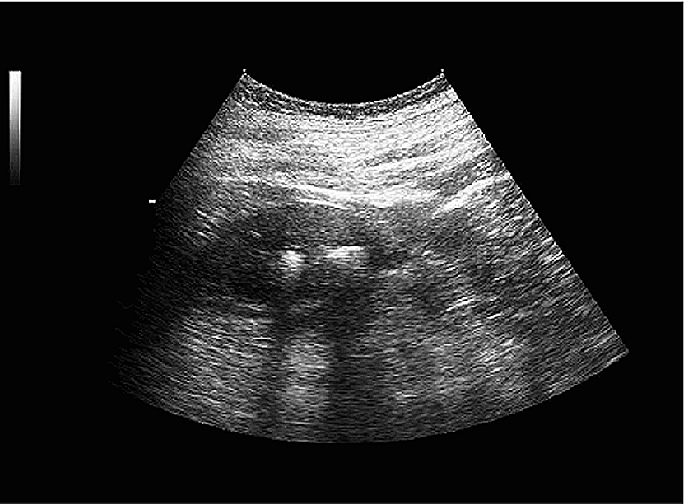

In [ ]:
# Create a sharpening kernel (example: Laplacian kernel)
import numpy as np
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply convolution to sharpen the image
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Display the original and sharpened images
cv2_imshow(image)
cv2_imshow(sharpened_image)

In [ ]:
# correlation

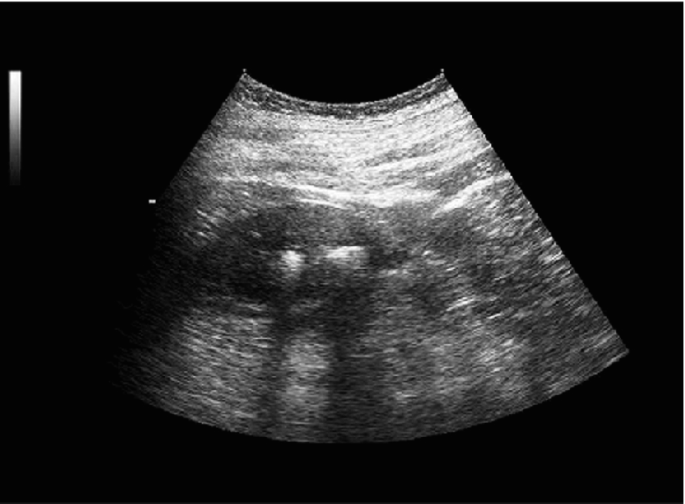

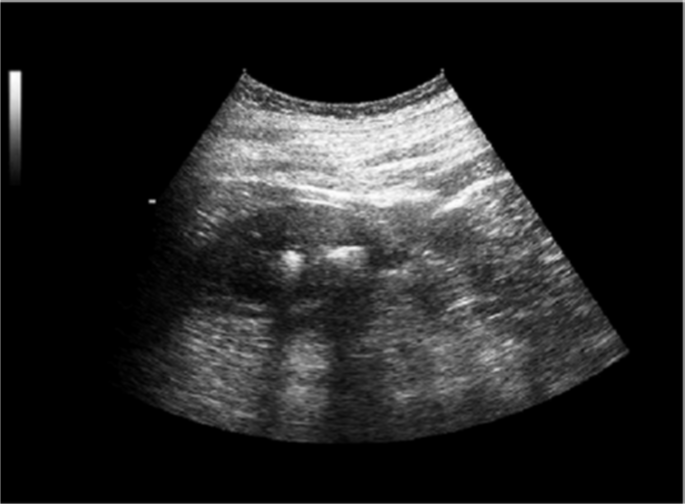

In [ ]:
import cv2
import numpy as np
from scipy.signal import convolve2d

# Define a kernel that represents the feature you want to enhance (e.g., a kidney stone)
# This is a simplified example; you may need to design a more specific kernel.
kernel = np.array([[1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 1]])

# Normalize the kernel to ensure that the result is not too bright
kernel = kernel / np.sum(kernel)

# Apply correlation filtering using convolution
enhanced_image = convolve2d(image, kernel, mode='same', boundary='wrap')

# Normalize the enhanced image to the [0, 255] range for display
enhanced_image = ((enhanced_image - np.min(enhanced_image)) / (np.max(enhanced_image) - np.min(enhanced_image)) * 255).astype(np.uint8)

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(enhanced_image)

In [ ]:
# smoothing spatial filters

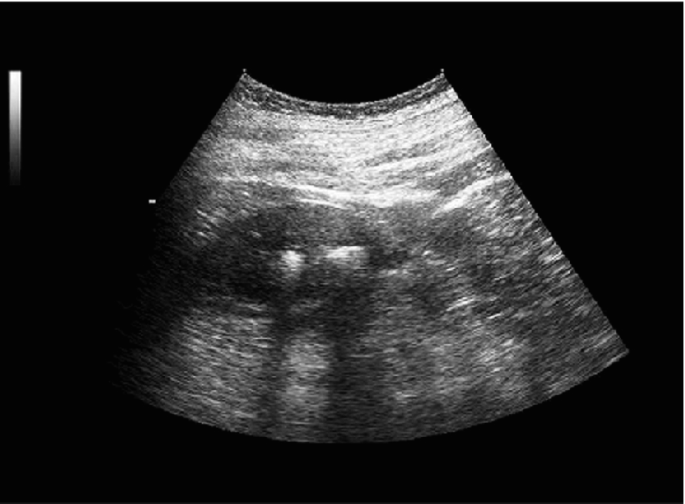

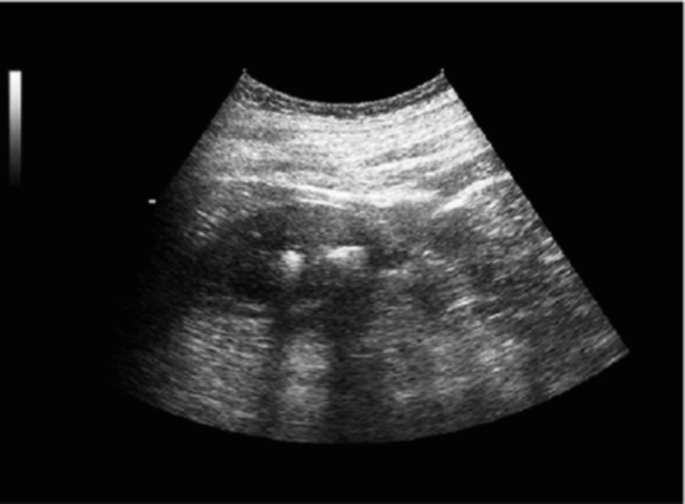

In [ ]:
# Apply a box filter for image smoothing (enhancement)
kernel_size = (3, 3)  # Adjust the kernel size as needed
box_filter_image = cv2.blur(image, kernel_size)

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(box_filter_image)

In [ ]:
# gaussian filter

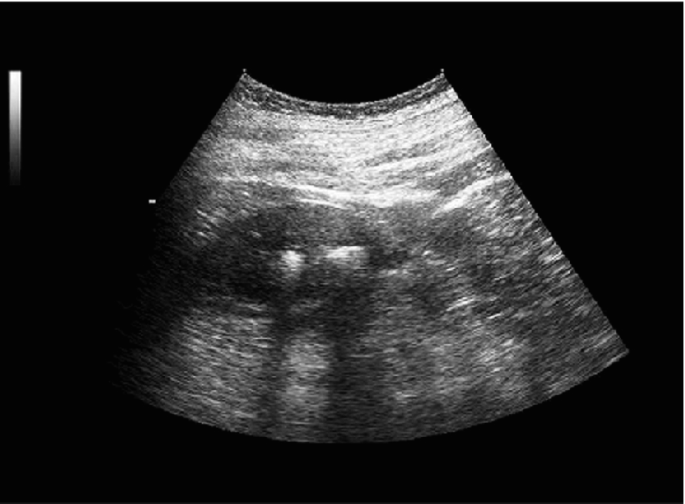

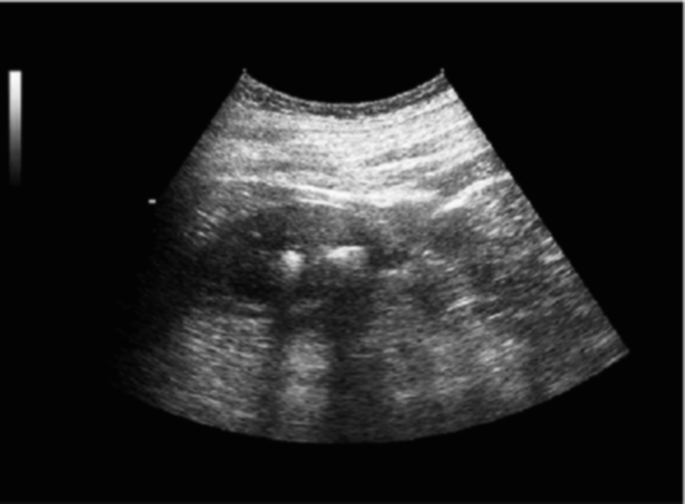

In [ ]:

# Apply a Gaussian filter for image smoothing (enhancement)
kernel_size = (5, 5)  # Adjust the kernel size as needed
sigma_x = 0  # Adjust the standard deviation as needed
gaussian_filter_image = cv2.GaussianBlur(image, kernel_size, sigma_x)

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(gaussian_filter_image)


In [ ]:
# median filter

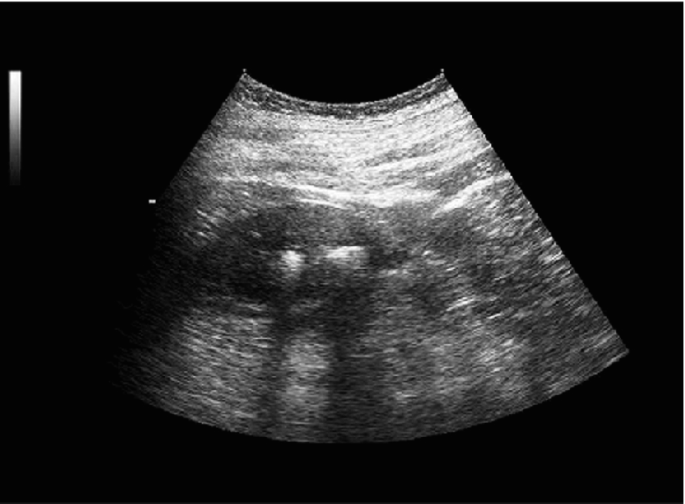

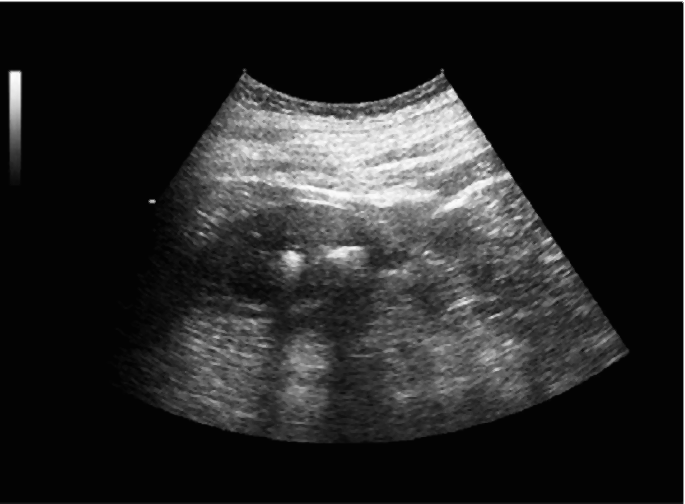

In [ ]:
# Apply a median filter for image smoothing (enhancement)
kernel_size = 3  # Adjust the kernel size as needed (must be an odd number)
median_filter_image = cv2.medianBlur(image, kernel_size)

# Display the original and enhanced images
cv2_imshow(image)
cv2_imshow(median_filter_image)

In [ ]:
# max and min filter resulted in morphological processing

In [ ]:
# sharpening spatial domain
# laplacian filter

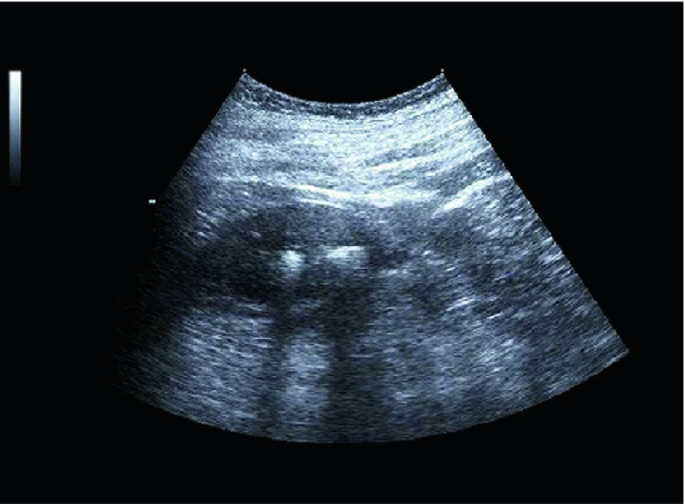

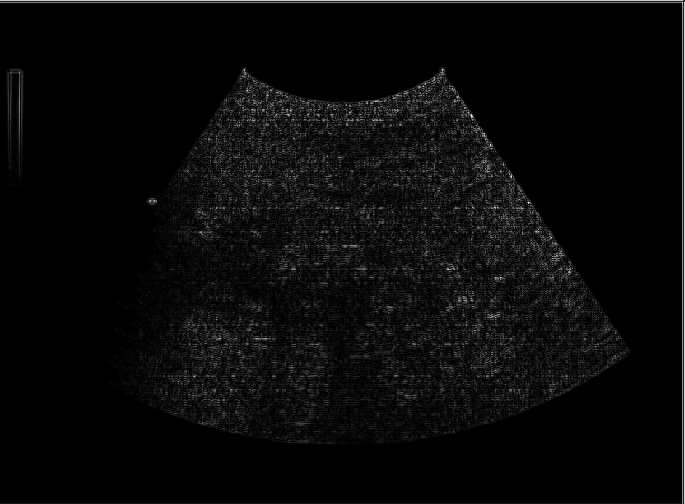

In [ ]:
import cv2
import numpy as np

# Load the kidney stone image (replace 'image_path' with the actual image file path)
original_image = cv2.imread('Kidney_stone.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply a Laplacian filter for image enhancement
laplacian_filtered_image = cv2.Laplacian(gray_image, cv2.CV_64F)

# Normalize the filtered image to the [0, 255] range
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)

# Display the original and Laplacian-filtered images
cv2_imshow(original_image)
cv2_imshow(laplacian_filtered_image)

In [ ]:
# highboost filter

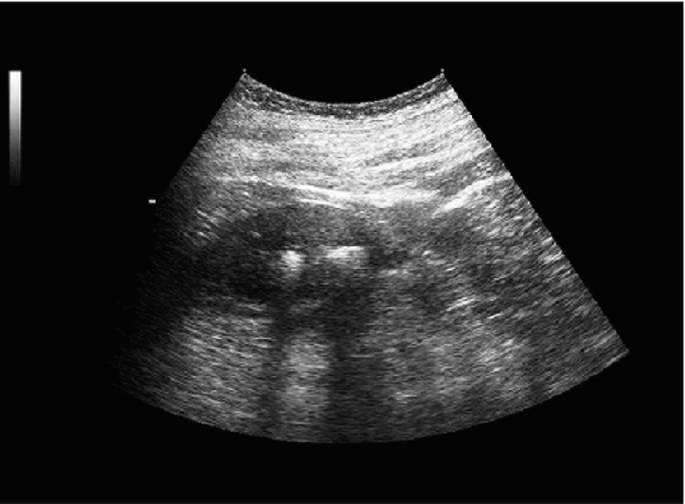

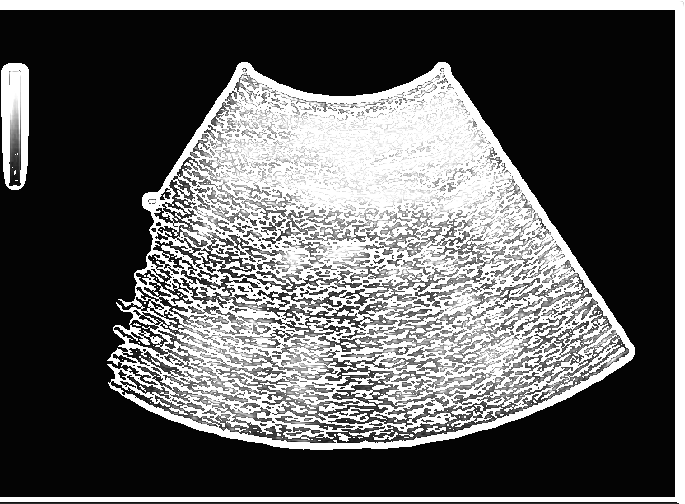

In [ ]:
import cv2
import numpy as np


# Apply Gaussian blur to create a low-pass filtered version
sigma = 3  # Adjust the sigma value as needed
blurred_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

# Calculate the high-boost filter
boost_factor = 1.5  # Adjust the boost factor as needed
highboost_filtered_image = gray_image + boost_factor * (gray_image - blurred_image)

# Normalize the filtered image to the [0, 255] range
highboost_filtered_image = np.clip(highboost_filtered_image, 0, 255).astype(np.uint8)

# Display the original and high-boost filtered images
cv2_imshow(gray_image)
cv2_imshow(highboost_filtered_image)


In [ ]:
# robert operator

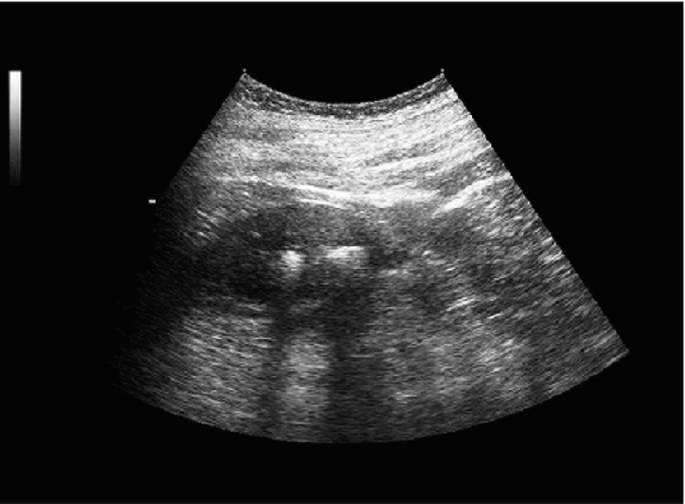

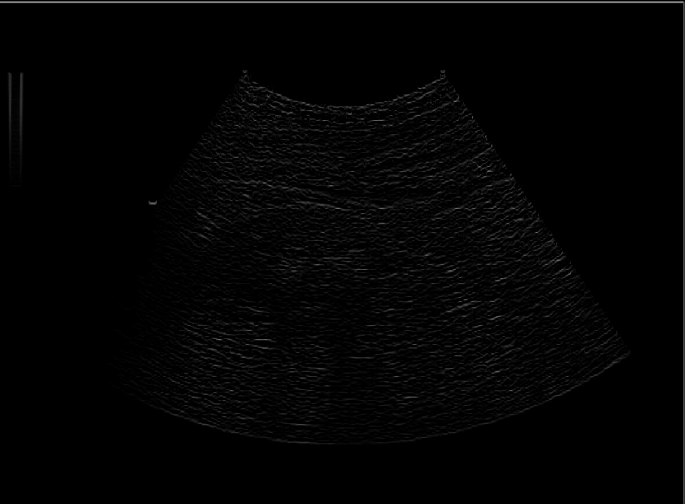

In [ ]:
# Define the Robert Operator kernels
kernel_x = np.array([[1, 0],
                     [0, -1]])

kernel_y = np.array([[0, 1],
                     [-1, 0]])

# Apply the Robert Operator kernels to calculate the gradients in the x and y directions
gradient_x = cv2.filter2D(gray_image, -1, kernel_x)
gradient_y = cv2.filter2D(gray_image, -1, kernel_y)

# Combine the gradient images to get the magnitude
magnitude_gradient = cv2.addWeighted(gradient_x, 0.5, gradient_y, 0.5, 0)

# Display the original grayscale image and the magnitude of gradients
cv2_imshow(gray_image)
cv2_imshow(magnitude_gradient)


In [ ]:
# sobel operator

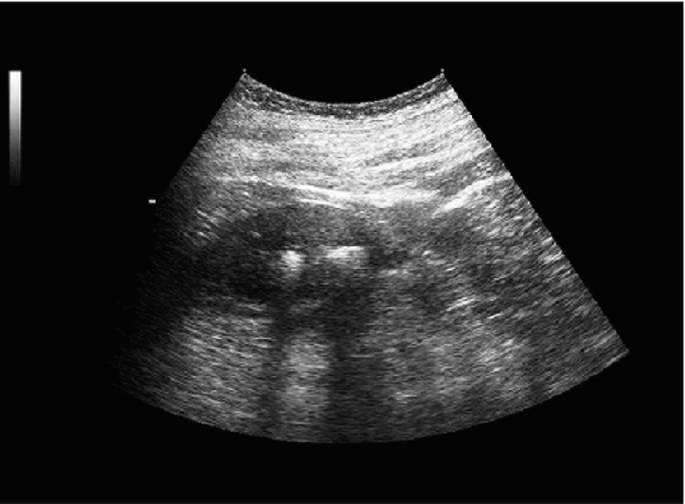

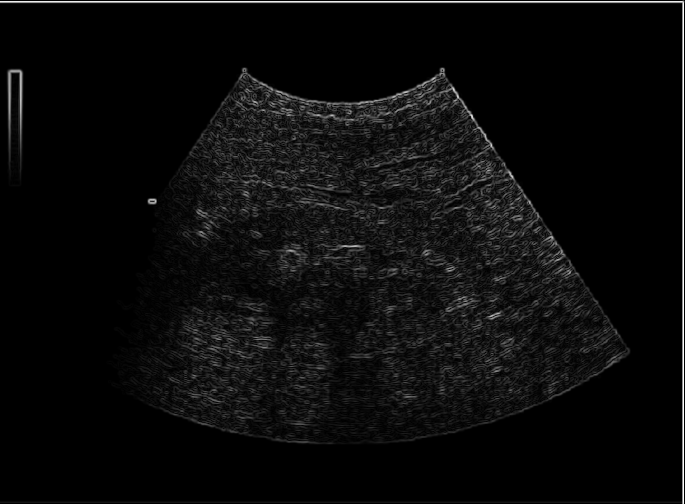

In [ ]:
# Apply Sobel operator to calculate gradients in the x and y directions
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of gradients
magnitude_gradient_sobel = cv2.magnitude(gradient_x, gradient_y)

# Normalize the gradient magnitude to the [0, 255] range
magnitude_gradient_sobel = cv2.normalize(magnitude_gradient_sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the original grayscale image and the magnitude of gradients
cv2_imshow(gray_image)
cv2_imshow(magnitude_gradient_sobel)


In [ ]:
# prewitt operator

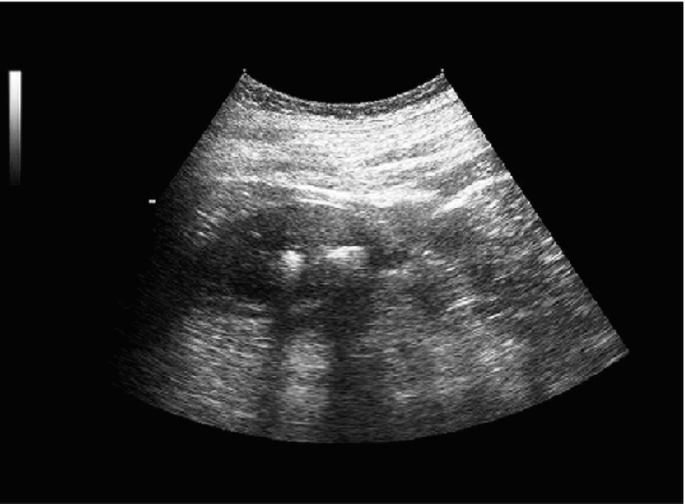

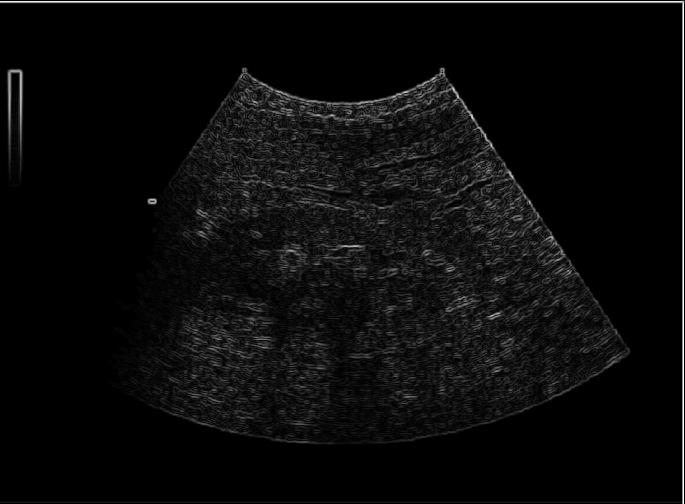

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the kidney stone image (replace 'image_path' with the actual image file path)
original_image = cv2.imread('Kidney_stone.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Define the Prewitt Operator kernels
kernel_x1 = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

kernel_y1 = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

# Apply the Prewitt Operator kernels to calculate the gradients in the x and y directions
gradient_x1 = cv2.filter2D(gray_image,cv2.CV_64F, kernel_x1)
gradient_y1 = cv2.filter2D(gray_image,cv2.CV_64F, kernel_y1)

# Calculate the magnitude of gradients
magnitude_gradient_prewitt = cv2.magnitude(gradient_x1, gradient_y1)

# Normalize the gradient magnitude to the [0, 255] range
magnitude_gradient_prewitt = cv2.normalize(magnitude_gradient_prewitt, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the original grayscale image and the magnitude of gradients
cv2_imshow(gray_image)
cv2_imshow(magnitude_gradient_prewitt)

In [ ]:
# image transformation

In [ ]:
#discrete fourier transform

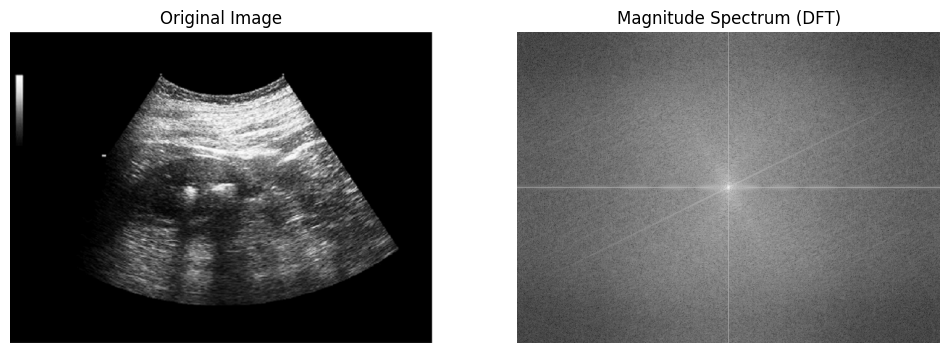

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Apply the Discrete Fourier Transform (DFT)
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Calculate the magnitude spectrum (logarithmic scale for visualization)
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

# Display the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (DFT)'), plt.axis('off')
plt.show()


In [ ]:
# hough transform

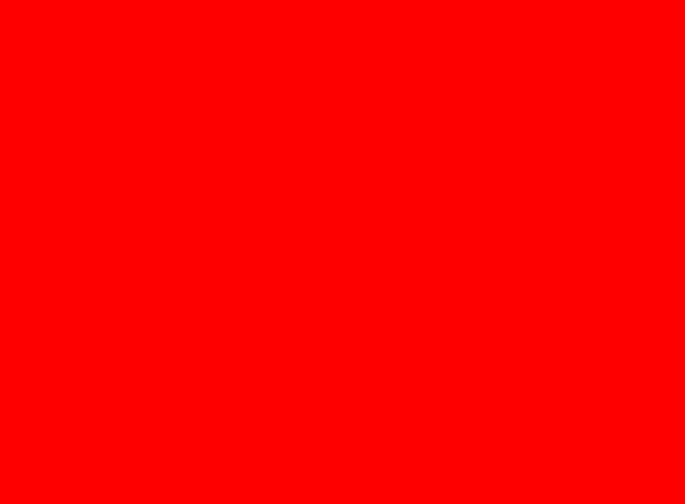

In [ ]:
import cv2
import numpy as np

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the grayscale image (e.g., using Canny)
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150, apertureSize=3)

# Apply the Hough Line Transform to detect lines in the edge image
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw the detected lines on the original image
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image with detected lines
cv2_imshow(image)



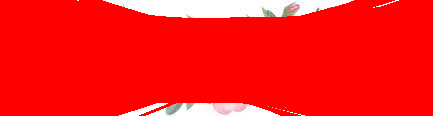

In [ ]:
import cv2
import numpy as np

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('flower.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the grayscale image (e.g., using Canny)
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150, apertureSize=3)

# Apply the Hough Line Transform to detect lines in the edge image
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw the detected lines on the original image
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image with detected lines
cv2_imshow(image)

In [ ]:
# frequency domain filters
# ideal LPF

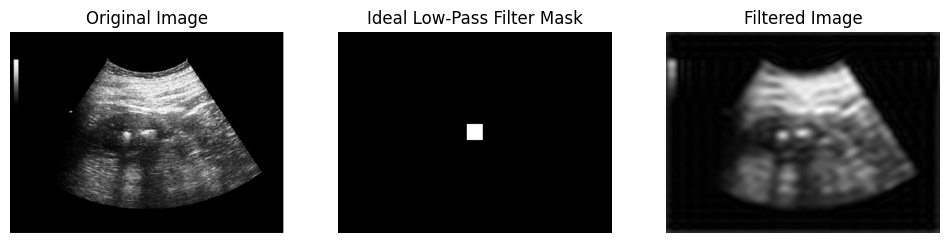

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Create an Ideal Low-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
cutoff_frequency = 20  # Adjust the cutoff frequency as needed
mask = np.zeros((rows, cols), np.uint8)
mask[center_row - cutoff_frequency:center_row + cutoff_frequency,
     center_col - cutoff_frequency:center_col + cutoff_frequency] = 1

# Apply the Ideal Low-Pass Filter by multiplying with the mask in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Ideal Low-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()


In [ ]:
# butter worth LPF

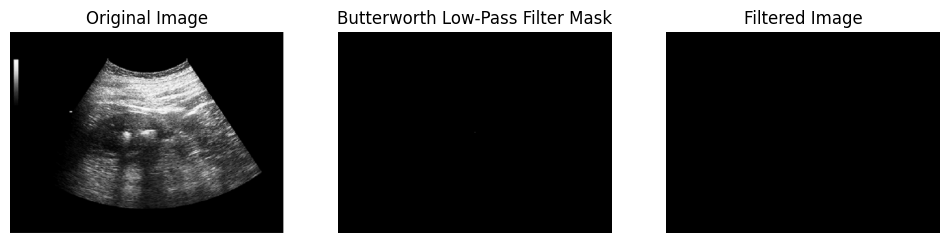

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Define filter parameters
cutoff_frequency = 20  # Adjust the cutoff frequency as needed
order = 2  # Adjust the order of the Butterworth filter

# Create a Butterworth Low-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = 1 / (1 + (distance / cutoff_frequency) ** (2 * order))

# Apply the Butterworth Low-Pass Filter by element-wise multiplication in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Butterworth Low-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()

In [ ]:
# gaussian low pass filter

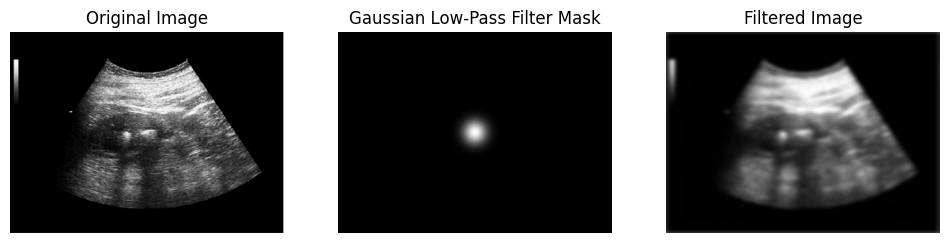

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Define filter parameters
cutoff_frequency = 20  # Adjust the cutoff frequency as needed

# Create a Gaussian Low-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
x = np.linspace(0, cols - 1, cols)
y = np.linspace(0, rows - 1, rows)
x, y = np.meshgrid(x, y)
distance = np.sqrt((x - center_col) ** 2 + (y - center_row) ** 2)
mask = np.exp(-0.5 * (distance / cutoff_frequency) ** 2)

# Apply the Gaussian Low-Pass Filter by element-wise multiplication in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Gaussian Low-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()

In [ ]:
# ideal HPF

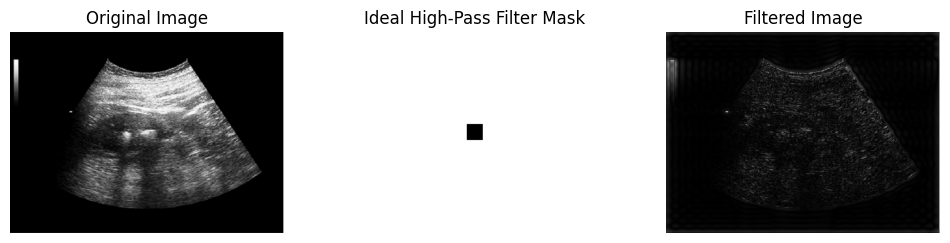

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Define filter parameters
cutoff_frequency = 20  # Adjust the cutoff frequency as needed

# Create an Ideal High-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[center_row - cutoff_frequency:center_row + cutoff_frequency,
     center_col - cutoff_frequency:center_col + cutoff_frequency] = 0

# Apply the Ideal High-Pass Filter by element-wise multiplication in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Ideal High-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()


In [ ]:
# butter worth HPF

<ipython-input-50-0631980652f9>:23: RuntimeWarning: divide by zero encountered in double_scalars
  mask[i, j] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))


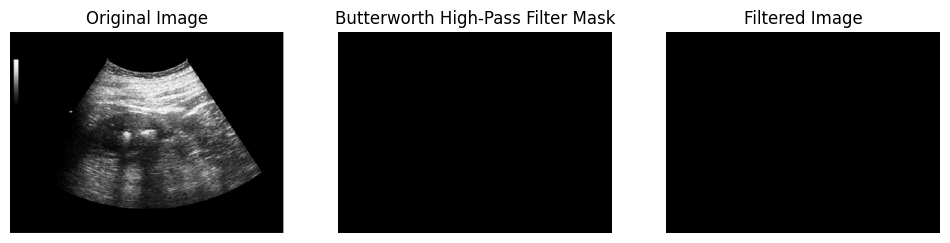

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Define filter parameters
cutoff_frequency = 20  # Adjust the cutoff frequency as needed
order = 2  # Adjust the order of the Butterworth filter

# Create a Butterworth High-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
        mask[i, j] = 1 / (1 + (cutoff_frequency / distance) ** (2 * order))

# Apply the Butterworth High-Pass Filter by element-wise multiplication in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Butterworth High-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()


In [ ]:
# gaussain HPF

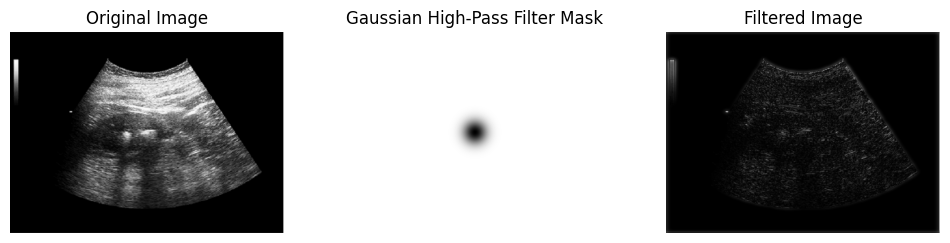

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D Discrete Fourier Transform (DFT) of the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

# Define filter parameters
cutoff_frequency = 20  # Adjust the cutoff frequency as needed

# Create a Gaussian High-Pass Filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
x = np.linspace(0, cols - 1, cols)
y = np.linspace(0, rows - 1, rows)
x, y = np.meshgrid(x, y)
distance = np.sqrt((x - center_col) ** 2 + (y - center_row) ** 2)
mask = 1 - np.exp(-0.5 * (distance / cutoff_frequency) ** 2)

# Apply the Gaussian High-Pass Filter by element-wise multiplication in the frequency domain
filtered_dft = dft_shifted * mask

# Inverse shift the filtered DFT and apply inverse DFT to get the filtered image
filtered_dft_shifted = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(filtered_dft_shifted)
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original image, the filter mask, and the filtered image
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(mask, cmap='gray')
plt.title('Gaussian High-Pass Filter Mask'), plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.axis('off')
plt.show()
